In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import os
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Downloading and preparing data for the analysis: 
macro_df = pd.read_excel('/content/assignment 5 data.xlsx')
macro_df.set_index('Year', inplace=True)
log_macro_df = np.log(macro_df)
log_macro_df.head(10)

,FCE (const LCU),GNI (constant LCU)
Year,,
1970,27.948373,28.136660
1971,27.956264,28.147346
1972,27.986794,28.170733
1973,28.012333,28.211354
1974,28.044500,28.242673
1975,28.078089,28.267813
1976,28.116364,28.278466
1977,28.119622,28.260682
1978,28.126558,28.278964


In [ ]:
log_macro_df=log_macro_df.drop(log_macro_df.tail(1).index)


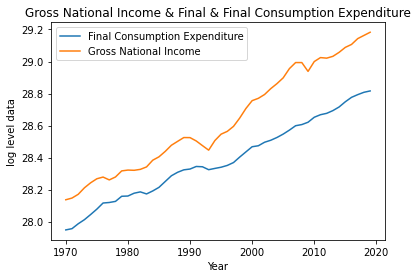

In [ ]:
plt.plot(log_macro_df)
plt.title('Gross National Income & Final & Final Consumption Expenditure')
plt.xlabel('Year')
plt.ylabel('log level data')
plt.gca().legend(('Final Consumption Expenditure', 'Gross National Income'))
plt.show()

In [ ]:
# Performing Augmnted Dickey Fuller test (ADF): 
# The test is performed for 
# Final Consumption Expenditure (constant LCU)
# “nc” : no constant, no trend
# “ct” : constant and trend.
# “c” : constant only.
for i in ['nc', 'c', 'ct']:
    result = adfuller(log_macro_df['FCE (const LCU)'],  autolag = 'AIC',  regression = i)
    print('ADF Statistic with %s for final consumption expenditure (constant LCU): %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('Critical values for the test statistic at the 1 %, 5 %, and 10 % levels')
    print((result[4]))
    print('')

ADF Statistic with nc for final consumption expenditure (constant LCU): 3.869565
p-value: 1.000000
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -2.6138933854166666, '5%': -1.9477740107783565, '10%': -1.6122352705439813}

ADF Statistic with c for final consumption expenditure (constant LCU): -0.576059
p-value: 0.876301
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}

ADF Statistic with ct for final consumption expenditure (constant LCU): -2.869385
p-value: 0.172628
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -4.160927854094329, '5%': -3.5062888245081014, '10%': -3.1828225911458334}



In [ ]:
# Performing Augmnted Dickey Fuller test (ADF): 
# The test is performed for 
# Gross National Income (constant LCU), GNI
# “nc” : no constant, no trend
# “ct” : constant and trend.
# “c” : constant only.
for i in ['nc', 'c', 'ct']:
    result = adfuller(log_macro_df['GNI (constant LCU)'],  autolag = 'AIC',  regression = i)
    print('ADF Statistic with %s for gross national income (constant LCU): %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('Critical values for the test statistic at the 1 %, 5 %, and 10 % levels')
    print((result[4]))
    print('')

ADF Statistic with nc for gross national income (constant LCU): 3.425778
p-value: 0.999986
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -2.6138933854166666, '5%': -1.9477740107783565, '10%': -1.6122352705439813}

ADF Statistic with c for gross national income (constant LCU): -0.002999
p-value: 0.958283
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}

ADF Statistic with ct for gross national income (constant LCU): -2.309936
p-value: 0.428462
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -4.160927854094329, '5%': -3.5062888245081014, '10%': -3.1828225911458334}



In [ ]:
# Taking first difference to account for non stationarity:

log_fce_diff = log_macro_df['FCE (const LCU)'].diff()[1:] # taking index at 1 to avoid NaN value after differencing
log_gni_diff = log_macro_df['GNI (constant LCU)'].diff()[1:] # taking index at 1 to avoid NaN value after differencing

In [ ]:
# Performing Augmnted Dickey Fuller test (ADF): 
# The test is performed for 
# DIFFRENCED Final Consumption Expenditure (constant LCU), GNI
# “nc” : no constant, no trend
# “ct” : constant and trend.
# “c” : constant only.
for i in ['nc', 'c', 'ct']:
    result = adfuller(log_fce_diff,  autolag = 'AIC',  regression = i)
    print('ADF Statistic with %s for final consumption expenditure (constant LCU): %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('Critical values for the test statistic at the 1 %, 5 %, and 10 % levels')
    print((result[4]))
    print('')

ADF Statistic with nc for final consumption expenditure (constant LCU): -2.385399
p-value: 0.016448
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -2.6138933854166666, '5%': -1.9477740107783565, '10%': -1.6122352705439813}

ADF Statistic with c for final consumption expenditure (constant LCU): -4.738684
p-value: 0.000071
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}

ADF Statistic with ct for final consumption expenditure (constant LCU): -4.683568
p-value: 0.000745
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -4.160927854094329, '5%': -3.5062888245081014, '10%': -3.1828225911458334}



In [ ]:
# Performing Augmnted Dickey Fuller test (ADF): 
# The test is performed for 
# DIFFRENCED Gross National Income (constant LCU), GNI
# “nc” : no constant, no trend
# “ct” : constant and trend.
# “c” : constant only.
for i in ['nc', 'c', 'ct']:
    result = adfuller(log_gni_diff,  autolag = 'AIC',  regression = i)
    print('ADF Statistic with %s for differenced gross national income (constant LCU): %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('Critical values for the test statistic at the 1 %, 5 %, and 10 % levels')
    print((result[4]))
    print('')

ADF Statistic with nc for differenced gross national income (constant LCU): -3.416755
p-value: 0.000651
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -2.6138933854166666, '5%': -1.9477740107783565, '10%': -1.6122352705439813}

ADF Statistic with c for differenced gross national income (constant LCU): -5.106654
p-value: 0.000014
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}

ADF Statistic with ct for differenced gross national income (constant LCU): -5.069014
p-value: 0.000154
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -4.160927854094329, '5%': -3.5062888245081014, '10%': -3.1828225911458334}



In [ ]:
# Running regression:
# adds a constant term
X = sm.add_constant(log_macro_df['GNI (constant LCU)'])
y = log_macro_df['FCE (const LCU)']
# create and fit the model:
model = sm.OLS(y, X)
model_fit = model.fit(cov_type='HC0')# cov_type specifies the useage of heteroskedasticity robust standard errors
# prints a summary
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        FCE (const LCU)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2464.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           6.49e-43
Time:                        06:39:16   Log-Likelihood:                 99.245
No. Observations:                  50   AIC:                            -194.5
Df Residuals:                      48   BIC:                            -190.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.6823      0

In [ ]:
# Performing Augmnted Dickey Fuller test (ADF): 
# The test is performed for 
# Residuals of the regression model
# “nc” : no constant, no trend
# “ct” : constant and trend.
# “c” : constant only.
for i in ['nc', 'c', 'ct']:
    result = adfuller(model_fit.resid,  autolag = 'AIC',  regression = i)
    print('ADF Statistic with %s for residuals of the regression model: %f' % (i, result[0]))
    print('p-value: %f' % result[1])
    print('Critical values for the test statistic at the 1 %, 5 %, and 10 % levels')
    print((result[4]))
    print('')



ADF Statistic with nc for residuals of the regression model: -2.690710
p-value: 0.006930
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -2.6138933854166666, '5%': -1.9477740107783565, '10%': -1.6122352705439813}

ADF Statistic with c for residuals of the regression model: -2.678219
p-value: 0.077884
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}

ADF Statistic with ct for residuals of the regression model: -2.617397
p-value: 0.271950
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels
{'1%': -4.160927854094329, '5%': -3.5062888245081014, '10%': -3.1828225911458334}



In [ ]:
# Preparing data for the ECM:

X['error_cor_term'] = model_fit.resid # adding resid term from the regression model
X['error_cor_term'] = X['error_cor_term'].shift(1) # Shifting residuals to make the series lagged
X['GNI (constant LCU)'] = X["GNI (constant LCU)"].diff()[1:]

# adding lags to final consumption and gross national income:
# adds 4  lags for the differenced final consumption expenditure:
for i in range(1, 5):
    new_col = 'FCE_L' + str(i)
    X[new_col] = log_fce_diff.shift(i)
# adds 4 lags for the differenced final consumption expenditure:
for i in range(1, 5):
    new_col = 'GNI_L' + str(i)
    X[new_col] = log_gni_diff.shift(i)

# droping rows with NaN values after lagging the variables
X = X.dropna()
y = y.diff()[1:]


In [ ]:
ts_start_after_lags = X.index[0]
y = y.loc[ts_start_after_lags:]


In [ ]:
# Running ECM:
# estimates a linear regression
ecm_model = sm.OLS(y,X)
ecm_model_fit=ecm_model.fit(cov_type='HC0')

# prints a summary
print(ecm_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        FCE (const LCU)   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     6.251
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.36e-05
Time:                        06:39:57   Log-Likelihood:                 151.62
No. Observations:                  45   AIC:                            -281.2
Df Residuals:                      34   BIC:                            -261.4
Df Model:                          10                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0121      0

In [ ]:
X.head()

,const,GNI (constant LCU),error_cor_term,FCE_L1,FCE_L2,FCE_L3,FCE_L4,GNI_L1,GNI_L2,GNI_L3,GNI_L4
Year,,,,,,,,,,,
1975,1.0,28.267813,-0.045321,0.032167,0.025539,0.030530,0.007892,0.031318,0.040621,0.023387,0.010686
1976,1.0,28.278466,-0.030787,0.033589,0.032167,0.025539,0.030530,0.025140,0.031318,0.040621,0.023387
1977,1.0,28.260682,-0.000587,0.038275,0.033589,0.032167,0.025539,0.010654,0.025140,0.031318,0.040621
1978,1.0,28.278964,0.016151,0.003258,0.038275,0.033589,0.032167,-0.017784,0.010654,0.025140,0.031318
1979,1.0,28.316913,0.009228,0.006935,0.003258,0.038275,0.033589,0.018282,-0.017784,0.010654,0.025140


In [ ]:
X_2 = X[['const', 'GNI (constant LCU)', 'error_cor_term', 'FCE_L1','FCE_L2', 'GNI_L1','GNI_L2']]

In [ ]:
# Running ECM with lags 1 and 2 for GNI and Consumption:
# estimates a linear regression
ecm_model = sm.OLS(y,X_2)
ecm_model_fit=ecm_model.fit(cov_type='HC0')

# prints a summary
print(ecm_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        FCE (const LCU)   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     9.484
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.26e-06
Time:                        06:43:16   Log-Likelihood:                 149.79
No. Observations:                  45   AIC:                            -285.6
Df Residuals:                      38   BIC:                            -272.9
Df Model:                           6                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0087      0

In [ ]:
X_1 = X[['const', 'GNI (constant LCU)', 'error_cor_term', 'FCE_L1', 'GNI_L1']]

In [ ]:
# Running ECM with lags 1 and 2 for GNI and Consumption:
# estimates a linear regression
ecm_model = sm.OLS(y,X_1)
ecm_model_fit=ecm_model.fit(cov_type='HC0')

# prints a summary
print(ecm_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:        FCE (const LCU)   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     12.99
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           7.20e-07
Time:                        06:45:00   Log-Likelihood:                 149.61
No. Observations:                  45   AIC:                            -289.2
Df Residuals:                      40   BIC:                            -280.2
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0093      0